In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import librosa

In [14]:
# Take in audio file path as input, returns spectrogram
def load_audio_spectrogram(file_path, n_mels=128, fmax=8000, duration=4):
   
    '''
    Definitions:
    file_path: file path to be loaded
    n_mels:  Mel frequency bands *play around with value*
    fmax: maximum frequency (means f > 8000 is ignored) *play around with value*
    duration: limits how long audio file is
    y: audio time series, array of amplitude values representing the sound wave over time
    sr: sampling rate, measured in samples per second (e.g., 22050 Hz means 22,050 samples per second)
    '''
    y, sr = librosa.load(file_path, duration=duration)

    # If audio less expected, pad it with empty values
    # standardized all audio to 4 secs
    # could change this: higher, lower, no standarization at all?
    if len(y) < sr * duration:
        y = np.pad(y, (0, sr * duration - len(y)))

    # Compute Mel-spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=fmax)
    S_dB = librosa.power_to_db(S, ref=np.max)

    #S_dB: Mel-spectrogram (in decibels) -> should we do this, or just return mel spectrogram
    return S_dB,sr

In [ ]:
# Loop over all files, obtain spectrogram and label for each
# load_audio_spectrogram turns file into spectrogram, cuts/pads audio to 4 seconds
# could increase or decrease the duration?

label_path = './data/labels.csv' # Change this to wherever labels.csv downloaded
labelled_df = pd.read_csv(label_path)

X = []
y = []  
label_to_int = {'belly': 0, 'chuckle': 1, 'baby': 2, 'evil': '3'}

base_path = './data/training-dataset' # Change this to wherever data folder downloaded
for index, row in labelled_df.iterrows():
    audio_id = row['id']           
    laugh_class = row['laugh_class']

    wav_file = os.path.join(base_path, f"{audio_id}.wav")
    mp3_file = os.path.join(base_path, f"{audio_id}.mp3")
    ogg_file = os.path.join(base_path, f"{audio_id}.ogg")

    # Check which file actually exists (3 types)
    if os.path.isfile(wav_file):
        file_path = wav_file
    elif os.path.isfile(mp3_file):
        file_path = mp3_file
    elif os.path.isfile(ogg_file):
        file_path = ogg_file
    else:
        print(f"No audio found for ID {audio_id}")
        continue

    #print(f"Loading {file_path} (class: {laugh_class})")
    
    sB,sr = load_audio_spectrogram(file_path)
    X.append(sB)
    y.append(label_to_int[laugh_class]) # Does this need to be encoded to int?


In [17]:
# Turn into numpy arrays, add greyscale channel dimensiional (CNN prep)
X = np.array(X)
y = np.array(y)
X = X[..., np.newaxis] # greyscale
print(f"{X.shape}") # num_samples, height, width
print(f"{y.shape}") # just label

(261, 128, 173, 1)
(261,)


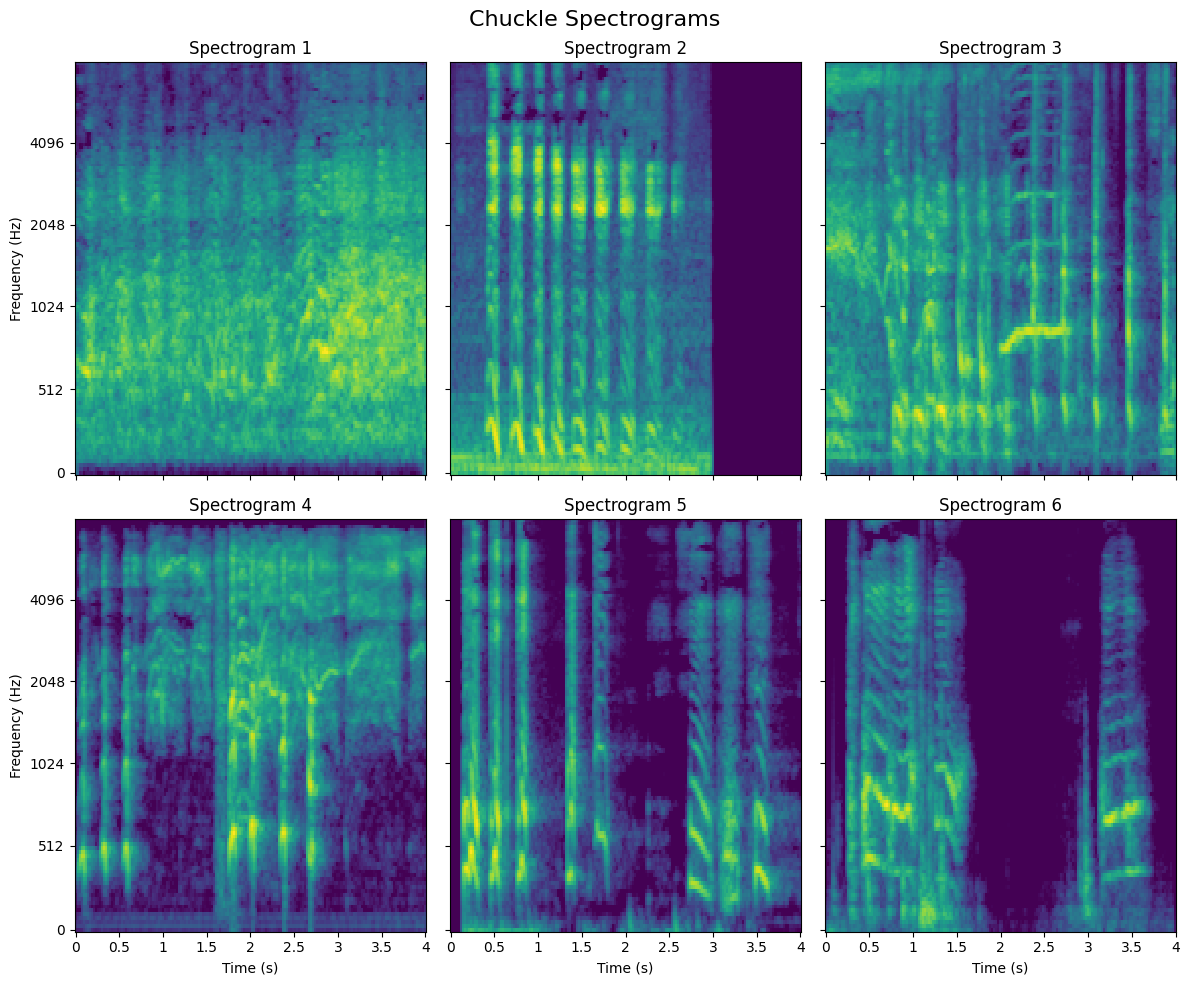

In [21]:
data_path = './data/training-dataset/' #replace with your data path
files = os.listdir(data_path)
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()

for i in range(6):
    file_path = data_path+files[i]
    

    S_dB,sr = load_audio_spectrogram(file_path)

    ax = axes[i]

    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, cmap='viridis', ax=ax)
    ax.set_title(f'Spectrogram {i+1}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    ax.label_outer()

plt.suptitle('Chuckle Spectrograms', fontsize=16)
plt.tight_layout()
plt.show()